In [1]:
# Google Colab Script for Construction Site Safety Dataset Analysis
# Step 1: Install and configure Kaggle API
!pip install -q kaggle

# Step 2: Input Kaggle API key
import os
from google.colab import files

# Prompt for the Kaggle API key
print("Upload your Kaggle API key (kaggle.json):")
uploaded = files.upload()

# Move the key to the correct directory
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
os.chmod('/root/.kaggle/kaggle.json', 600)

# Step 3: Download the dataset
!kaggle datasets download -d snehilsanyal/construction-site-safety-image-dataset-roboflow --unzip -p /content/construction_site_dataset


Upload your Kaggle API key (kaggle.json):


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow
License(s): Attribution 4.0 International (CC BY 4.0)
 93% 192M/206M [00:00<00:00, 232MB/s]
100% 206M/206M [00:00<00:00, 236MB/s]


In [20]:
# Define the class labels mapping
class_labels = {
    0: 'Hardhat',
    1: 'Mask',
    2: 'NO-Hardhat',
    3: 'NO-Mask',
    4: 'NO-Safety Vest',
    5: 'Person',
    6: 'Safety Cone',
    7: 'Safety Vest',
    8: 'Machinery',
    9: 'Vehicle'
}

In [21]:
# Step 4: Verify folder structure
import os

dataset_path = "/content/construction_site_dataset/css-data"



In [22]:
# Step 5: Load and visualize the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

# Define paths for train and test folders
train_path = os.path.join(dataset_path, 'train', 'images')
test_path = os.path.join(dataset_path, 'test', 'images')



In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Augmentation parameters for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally
    height_shift_range=0.2,  # Shift images vertically
    shear_range=0.15,  # Shear images
    zoom_range=0.2,  # Zoom in/out on images
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill missing pixels with nearest values
)


In [24]:
# No augmentation for test data, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare augmented training data generator
train_generator = train_datagen.flow_from_directory(
    os.path.dirname(train_path),
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

# Prepare test data generator
test_generator = test_datagen.flow_from_directory(
    os.path.dirname(test_path),
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 2605 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


Augmented Training Images:


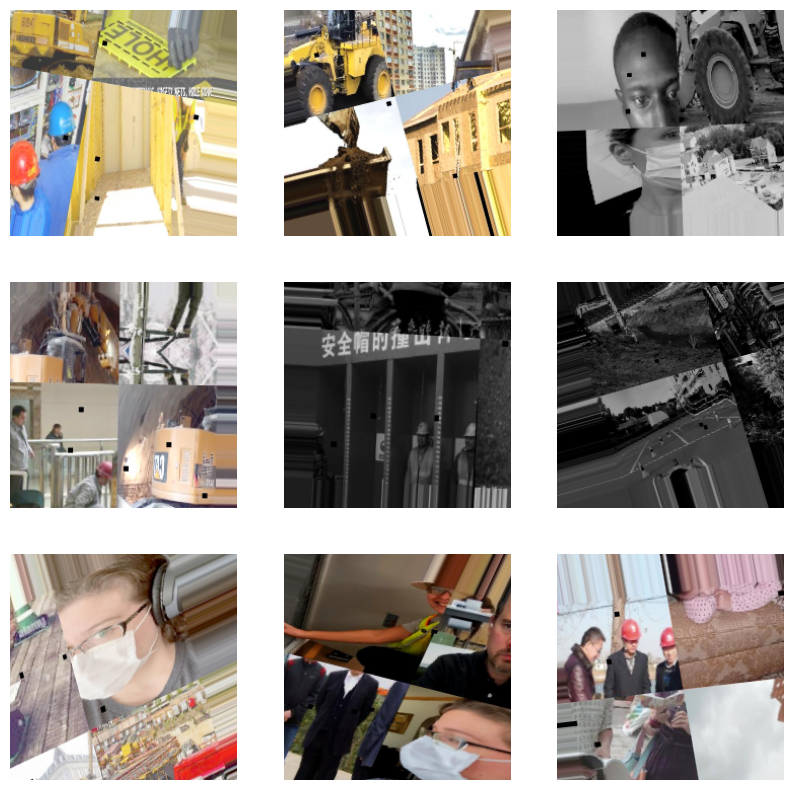

In [25]:
# Visualize augmented images
def plot_augmented_images(generator):
    batch = next(generator)
    images, labels = batch
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

print("Augmented Training Images:")
plot_augmented_images(train_generator)

In [7]:
# Step 7: Define the model (Example: Simple CNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Step 8: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Step 9: Train the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Add callbacks for early stopping and saving the best model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 55s 506ms/step - accuracy: 0.9774 - loss: 0.0366 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 391ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 35s 400ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 403ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 400ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 42s 404ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


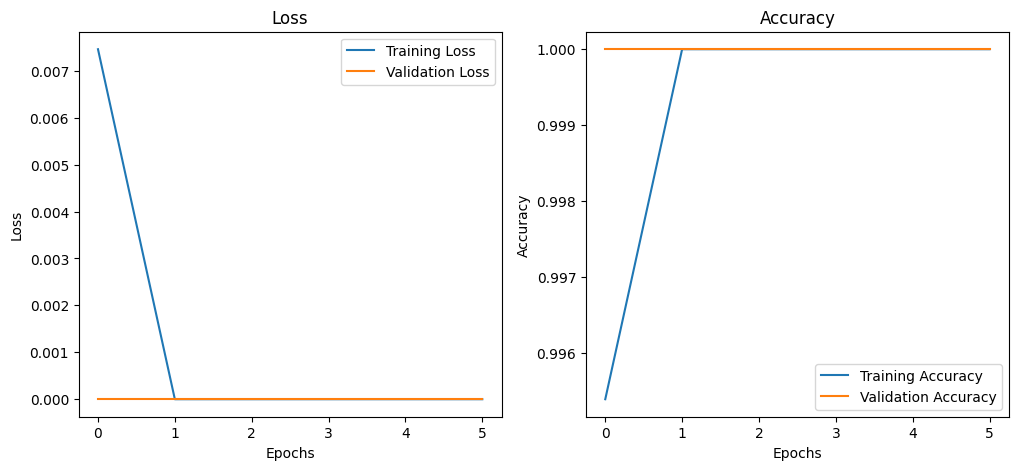

In [10]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Call the function to visualize
plot_training_history(history)


In [11]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.0000e+00 
Test Loss: 0.0000
Test Accuracy: 1.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


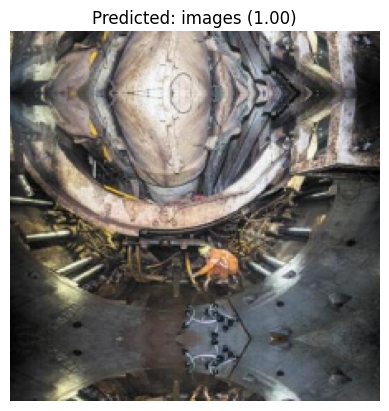

In [15]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to predict and visualize results
def predict_image(image_path, model, class_indices):
    img = load_img(image_path, target_size=(224, 224))  # Resize to model's input size
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(img_array)
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

# Test the model on a sample image
sample_image_path = "/content/construction_site_dataset/css-data/test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg"
predict_image(sample_image_path, model, train_generator.class_indices)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


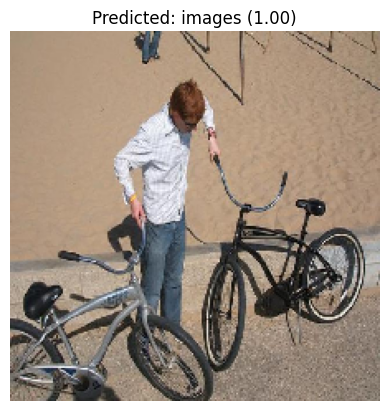

In [19]:
new_test_image_path = "/content/construction_site_dataset/css-data/test/images/2008_008320_jpg.rf.bd34011d46f82f9410d95f00e560b8ea.jpg"
predict_image(new_test_image_path, model, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: Hardhat
Confidence: 1.00


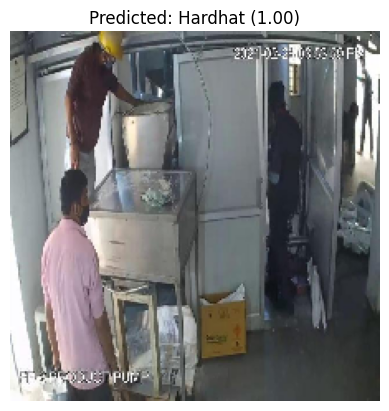

In [29]:
# Function to predict and visualize results
def predict_image(image_path, model, class_indices):
    img = load_img(image_path, target_size=(224, 224))  # Resize to model's input size
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]  # Map to the class label
    confidence = np.max(prediction)

    # Print prediction to console
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

# Test the model on a sample image
sample_image_path = "/content/construction_site_dataset/css-data/test/images/NX_img_177_jpg.rf.c03709e5fadfe2109411f05a9e9bc25f.jpg"
predict_image(sample_image_path, model, train_generator.class_indices)